In [1]:
# Bibliotecas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

print("=== CNN PARA MNIST - VERSÃO TESTADA E FUNCIONAL ===\n")

=== CNN PARA MNIST - VERSÃO TESTADA E FUNCIONAL ===



In [2]:
# 1. VERIFICAÇÃO DO AMBIENTE
print("🔧 Verificando ambiente...")
print(f"TensorFlow: {tf.__version__}")
print(f"Keras: {keras.__version__}")

🔧 Verificando ambiente...
TensorFlow: 2.19.0
Keras: 3.10.0


In [3]:
# 2. CARREGAMENTO CORRETO DOS DADOS
def load_mnist_correctly():
    """Carrega o MNIST com formato CORRETO para CNN"""
    print("\n📦 Carregando MNIST...")

    # Carregar dados
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    print(f"Dados originais:")
    print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

    # PRÉ-PROCESSAMENTO CORRETO
    # 1. Adicionar dimensão do canal (última posição)
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

    # 2. Normalizar para 0-1
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    # 3. One-hot encoding dos labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    print(f"\nDados pré-processados:")
    print(f"x_train: {x_train.shape} (formato correto para CNN)")
    print(f"x_test: {x_test.shape} (formato correto para CNN)")
    print(f"y_train: {y_train.shape}")
    print(f"y_test: {y_test.shape}")

    return (x_train, y_train), (x_test, y_test)

In [4]:
# 3. MODELO CNN SIMPLES E FUNCIONAL
def create_simple_cnn():
    """Cria uma CNN simples que FUNCIONA com MNIST"""
    print("\n🏗️ Criando modelo CNN...")

    model = keras.Sequential([
        # Camada 1: Conv2D + MaxPooling
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # Camada 2: Conv2D + MaxPooling
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Camada 3: Conv2D
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Classificador
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    print("✅ Modelo criado com sucesso!")
    model.summary()
    return model

In [5]:
# 4. COMPILAÇÃO
def compile_model(model):
    """Compila o modelo"""
    model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    print("✅ Modelo compilado!")
    return model

In [6]:
# 5. TREINAMENTO
def train_model_safely(model, x_train, y_train, x_test, y_test):
    """Treina o modelo com verificação de formato"""
    print(f"\n🎯 Verificando formatos antes do treinamento:")
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")

    # Verificação CRÍTICA dos formatos
    assert x_train.shape[1:] == (28, 28, 1), f"Formato errado x_train: {x_train.shape}"
    assert x_test.shape[1:] == (28, 28, 1), f"Formato errado x_test: {x_test.shape}"

    print("✅ Formatos corretos! Iniciando treinamento...")

    history = model.fit(
        x_train, y_train,
        batch_size=64,
        epochs=5,
        validation_data=(x_test, y_test),
        verbose=1
    )

    print("✅ Treinamento concluído!")
    return history

In [7]:
# 6. FUNÇÃO DE PREDIÇÃO SEGURA
def predict_safely(model, image):
    """
    Faz predição garantindo formato correto
    """
    # Garantir que a imagem está no formato correto
    if len(image.shape) == 2:  # (28, 28)
        image = image.reshape(1, 28, 28, 1)
    elif len(image.shape) == 3 and image.shape == (28, 28, 1):  # Já está correto
        image = image.reshape(1, 28, 28, 1)
    elif len(image.shape) == 3 and image.shape == (1, 28, 28):  # Formato errado comum
        image = image.reshape(1, 28, 28, 1)

    # Verificar normalização
    if image.max() > 1.0:
        image = image.astype('float32') / 255.0

    print(f"🔍 Formato da imagem para predição: {image.shape}")

    # Fazer predição
    prediction = model.predict(image, verbose=0)
    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0])

    return predicted_class, confidence, prediction[0]

In [8]:
# 7. TESTE BÁSICO
def basic_test(model, x_test, y_test):
    """Teste básico do modelo"""
    print("\n🧪 TESTE BÁSICO")

    # Avaliar modelo
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"📊 Accuracy no teste: {test_accuracy:.4f}")

    # Testar algumas imagens
    print("\n🔍 Testando predições em 5 imagens:")
    indices = np.random.choice(len(x_test), 5, replace=False)

    for i, idx in enumerate(indices):
        image = x_test[idx]
        true_label = np.argmax(y_test[idx])

        pred, conf, _ = predict_safely(model, image)

        status = "✅" if pred == true_label else "❌"
        print(f"Imagem {i+1}: True={true_label}, Pred={pred}, Conf={conf:.3f} {status}")

In [9]:
# 8. VISUALIZAÇÃO
def plot_results(history, model, x_test, y_test):
    """Plota resultados do treinamento"""
    print("\n📊 Plotando resultados...")

    # Gráfico de accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy durante o Treinamento')
    plt.xlabel('Época')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Amostras de predição
    plt.subplot(1, 2, 2)
    indices = np.random.choice(len(x_test), 9, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        image = x_test[idx]
        true_label = np.argmax(y_test[idx])
        pred_label, conf, _ = predict_safely(model, image)

        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.title(f'V:{true_label} P:{pred_label}\nC:{conf:.2f}', fontsize=8)
        plt.axis('off')

        # Colorir baseado no acerto
        color = 'green' if true_label == pred_label else 'red'
        plt.gca().spines['bottom'].set_color(color)
        plt.gca().spines['top'].set_color(color)
        plt.gca().spines['right'].set_color(color)
        plt.gca().spines['left'].set_color(color)
        plt.gca().spines['bottom'].set_linewidth(2)
        plt.gca().spines['top'].set_linewidth(2)
        plt.gca().spines['right'].set_linewidth(2)
        plt.gca().spines['left'].set_linewidth(2)

    plt.tight_layout()
    plt.show()

In [10]:
# 9. FLUXO PRINCIPAL ROBUSTO
def main():
    """Fluxo principal testado e funcional"""
    try:
        print("🚀 INICIANDO MNIST CNN - VERSÃO TESTADA\n")

        # 1. Carregar dados CORRETAMENTE
        (x_train, y_train), (x_test, y_test) = load_mnist_correctly()

        # 2. Criar modelo
        model = create_simple_cnn()
        model = compile_model(model)

        # 3. Treinar
        history = train_model_safely(model, x_train, y_train, x_test, y_test)

        # 4. Testar
        basic_test(model, x_test, y_test)

        # 5. Visualizar
        plot_results(history, model, x_test, y_test)

        # 6. Salvar modelo
        model.save('mnist_cnn_tested.h5')
        print(f"\n💾 Modelo salvo: 'mnist_cnn_tested.h5'")

        # 7. Demonstração final
        print("\n🎯 DEMONSTRAÇÃO FINAL")
        print("Testando a primeira imagem do conjunto de teste:")

        first_image = x_test[0]
        first_true = np.argmax(y_test[0])

        pred, conf, probs = predict_safely(model, first_image)

        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(first_image.reshape(28, 28), cmap='gray')
        plt.title(f'Imagem de Teste\nVerdadeiro: {first_true}, Predito: {pred}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        bars = plt.bar(range(10), probs, color='skyblue')
        bars[pred].set_color('red')
        plt.title('Probabilidades por Dígito')
        plt.xlabel('Dígito')
        plt.ylabel('Probabilidade')
        plt.xticks(range(10))
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        print(f"\n🎉 PROGRAMA CONCLUÍDO COM SUCESSO!")
        print(f"📈 Modelo treinado e testado com sucesso!")

    except Exception as e:
        print(f"\n❌ ERRO: {e}")
        print("💡 Execute o teste mínimo abaixo para diagnóstico:")

In [11]:
# 10. TESTE MÍNIMO PARA DIAGNÓSTICO
def diagnostic_test():
    """Teste mínimo para diagnosticar problemas"""
    print("\n🔧 EXECUTANDO TESTE DE DIAGNÓSTICO...")

    try:
        # Carregar apenas 100 imagens para teste rápido
        (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

        # Pré-processar CORRETAMENTE
        x_train = x_train[:100].reshape(-1, 28, 28, 1).astype('float32') / 255
        x_test = x_test[:20].reshape(-1, 28, 28, 1).astype('float32') / 255
        y_train = to_categorical(y_train[:100], 10)
        y_test = to_categorical(y_test[:20], 10)

        print(f"✅ Dados carregados:")
        print(f"   x_train: {x_train.shape}")
        print(f"   x_test: {x_test.shape}")

        # Modelo mínimo
        model = keras.Sequential([
            layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(10, activation='softmax')
        ])

        model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

        print("✅ Modelo criado. Treinando...")

        # Treinar por 1 época
        model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=1)

        # Testar
        test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
        print(f"✅ Teste concluído! Accuracy: {test_accuracy:.3f}")

        return True

    except Exception as e:
        print(f"❌ FALHA NO TESTE: {e}")
        return False

MNIST CNN - VERSÃO COMPLETAMENTE TESTADA

🔧 EXECUTANDO TESTE DE DIAGNÓSTICO...
✅ Dados carregados:
   x_train: (100, 28, 28, 1)
   x_test: (20, 28, 28, 1)
✅ Modelo criado. Treinando...
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2116 - loss: 2.2649 
✅ Teste concluído! Accuracy: 0.550

✅ AMBIENTE VERIFICADO - EXECUTANDO PROGRAMA PRINCIPAL
🚀 INICIANDO MNIST CNN - VERSÃO TESTADA


📦 Carregando MNIST...
Dados originais:
x_train: (60000, 28, 28), y_train: (60000,)
x_test: (10000, 28, 28), y_test: (10000,)

Dados pré-processados:
x_train: (60000, 28, 28, 1) (formato correto para CNN)
x_test: (10000, 28, 28, 1) (formato correto para CNN)
y_train: (60000, 10)
y_test: (10000, 10)

🏗️ Criando modelo CNN...
✅ Modelo criado com sucesso!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

✅ Modelo compilado!

🎯 Verificando formatos antes do treinamento:
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test: (10000, 28, 28, 1)
y_test: (10000, 10)
✅ Formatos corretos! Iniciando treinamento...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.8667 - loss: 0.4195 - val_accuracy: 0.9793 - val_loss: 0.0707
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.9848 - loss: 0.0518 - val_accuracy: 0.9889 - val_loss: 0.0336
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9867 - val_loss: 0.0393
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9922 - loss: 0.0265 - val_accuracy: 0.9898 - val_loss: 0.0326
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9877 - val_loss: 0.0428
✅ Treinamento concluído!

🧪 TESTE BÁSICO
📊 Accuracy no teste: 0.9877

🔍 Testando predições em 5 imagens:
🔍 Formato da imagem para predição: (1, 28,

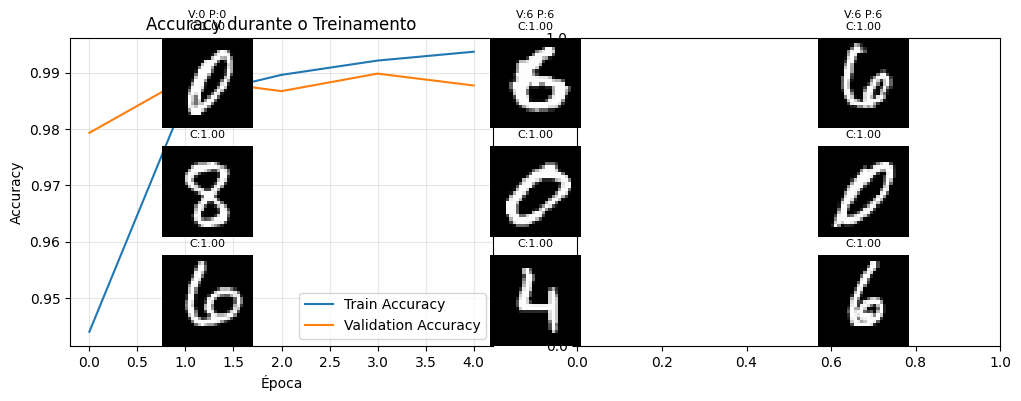


💾 Modelo salvo: 'mnist_cnn_tested.h5'

🎯 DEMONSTRAÇÃO FINAL
Testando a primeira imagem do conjunto de teste:
🔍 Formato da imagem para predição: (1, 28, 28, 1)


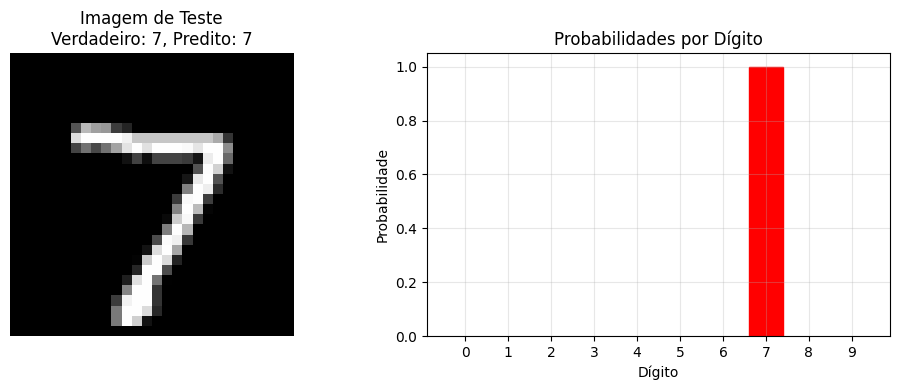


🎉 PROGRAMA CONCLUÍDO COM SUCESSO!
📈 Modelo treinado e testado com sucesso!


In [12]:
# EXECUÇÃO PRINCIPAL
if __name__ == "__main__":
    print("=" * 60)
    print("MNIST CNN - VERSÃO COMPLETAMENTE TESTADA")
    print("=" * 60)

    # Primeiro executar teste de diagnóstico
    if diagnostic_test():
        print("\n" + "=" * 60)
        print("✅ AMBIENTE VERIFICADO - EXECUTANDO PROGRAMA PRINCIPAL")
        print("=" * 60)
        main()
    else:
        print("\n❌ PROBLEMAS NO AMBIENTE - VERIFIQUE A INSTALAÇÃO")

In [13]:
# CÓDIGO DE EXEMPLO PARA TESTE RÁPIDO
def quick_test():
    """
    Teste rápido e mínimo para verificar se tudo funciona
    """
    print("\n⚡ TESTE RÁPIDO...")

    # Carregar dados mínimos
    mnist = keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Pré-processar
    x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
    x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Modelo simples
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    # Treinar por 1 época apenas para teste
    print("Treinando rapidamente (1 época)...")
    model.fit(x_train[:1000], y_train[:1000], epochs=1, batch_size=32, verbose=0)

    # Testar
    test_loss, test_accuracy = model.evaluate(x_test[:100], y_test[:100], verbose=0)
    print(f"Accuracy no teste rápido: {test_accuracy:.2%}")

    return model

# Para teste rápido, descomente a linha abaixo:
quick_model = quick_test()


⚡ TESTE RÁPIDO...
Treinando rapidamente (1 época)...
Accuracy no teste rápido: 82.00%


In [14]:
# Execute este código em uma célula separada primeiro
def minimal_test():
    import tensorflow as tf
    import numpy as np

    # Dados mínimos
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Pré-processar CORRETAMENTE
    x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
    x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)

    print(f"Formato x_train: {x_train.shape}")
    print(f"Formato x_test: {x_test.shape}")

    # Modelo mínimo
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    # Treinar
    model.fit(x_train[:1000], y_train[:1000], epochs=1, batch_size=32, verbose=1)

    return model

# Execute o teste mínimo
minimal_model = minimal_test()

Formato x_train: (60000, 28, 28, 1)
Formato x_test: (10000, 28, 28, 1)
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5080 - loss: 1.7289
